# Cleaning and Visualizing Food Coded Dataset

## Cleaning Dataset

In [3]:
import pandas as pd

# Load the data
file_path = r'C:\Users\Me\Downloads\food_coded.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

# Basic Information
print("\nBasic Information:")
print(data.info())

# Handling Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# 1. Fill missing values with the mean (for numeric columns)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# 2: Fill missing values with the most frequent value (for categorical columns)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# 3. Removing Duplicates
data.drop_duplicates(inplace=True)

# 4. Correcting Data Types
print("\nData Types:")
print(data.dtypes)

# 5. Handling Outliers
from scipy import stats
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    z_scores = stats.zscore(data[col].dropna())
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    data = data[filtered_entries]

# 6. Reset Index After Dropping Rows
data.reset_index(drop=True, inplace=True)

# Display the cleaned data
print("\nCleaned Data:")
print(data.head())

# Save cleaned data to a new CSV file
cleaned_file_path = r'C:\Users\Me\Downloads\food_coded_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

Initial Data:
     GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2    3.3       1          1               720           4.0           420.0   
3    3.2       1          1               430           3.0           420.0   
4    3.5       1          1               720           2.0           420.0   

   coffee                      comfort_food        comfort_food_reasons  \
0       1                              none       we dont have comfort    
1       2       chocolate, chips, ice cream        Stress, bored, anger   
2       2   frozen yogurt, pizza, fast food             stress, sadness   
3       2  Pizza, Mac and cheese, ice cream                     Boredom   
4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    

   comfort_food_reasons_coded  ...  soup  sports  thai_food 

## Visualizing Food Coded Dataset

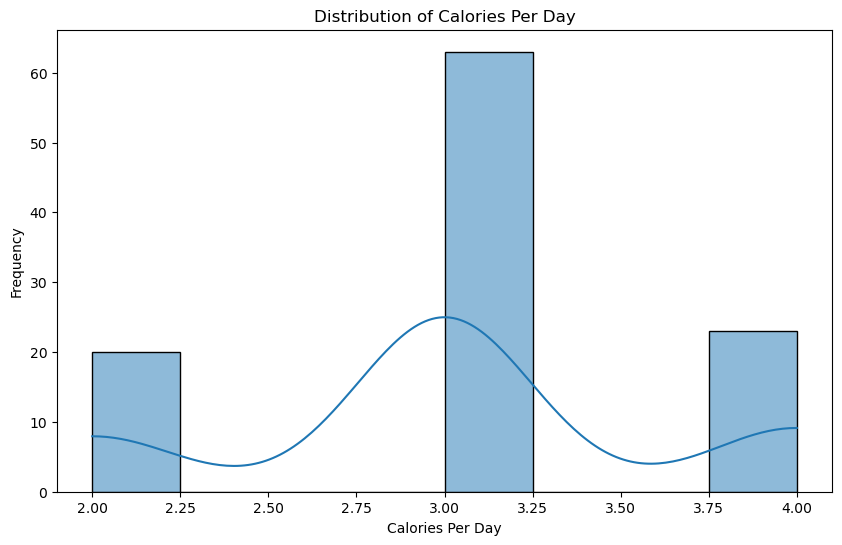

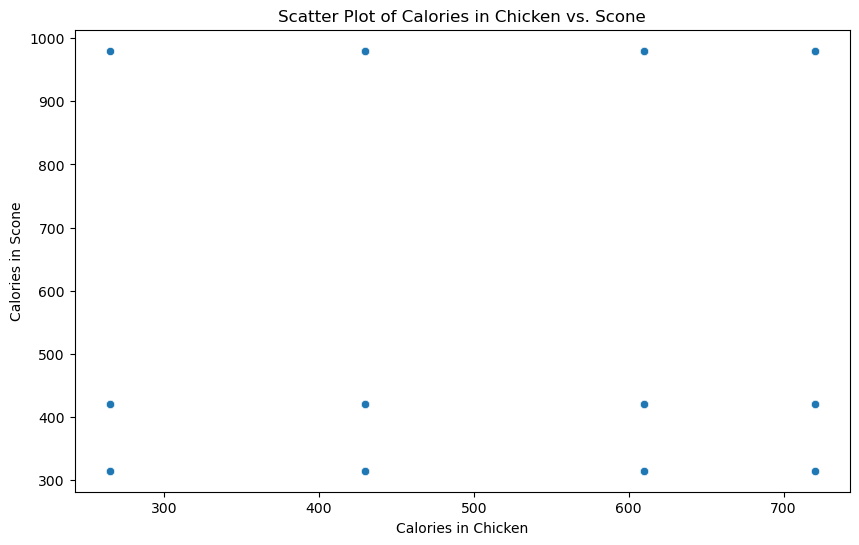

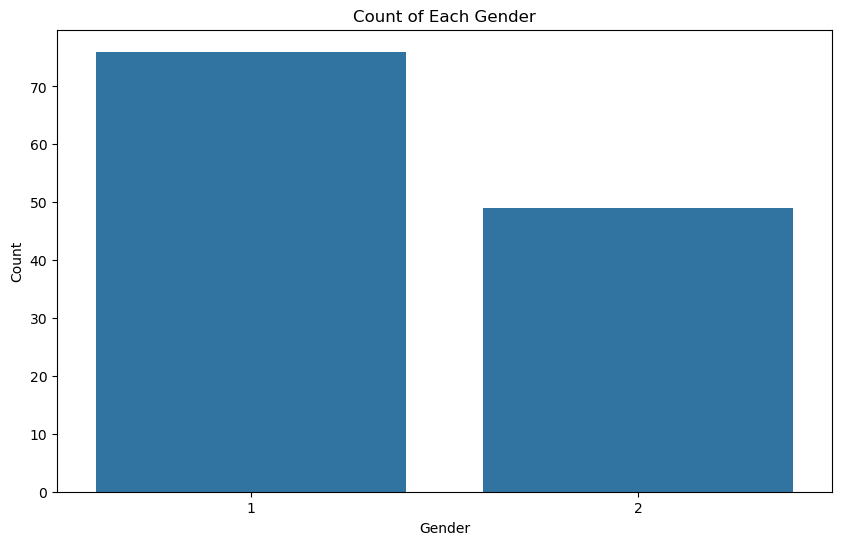

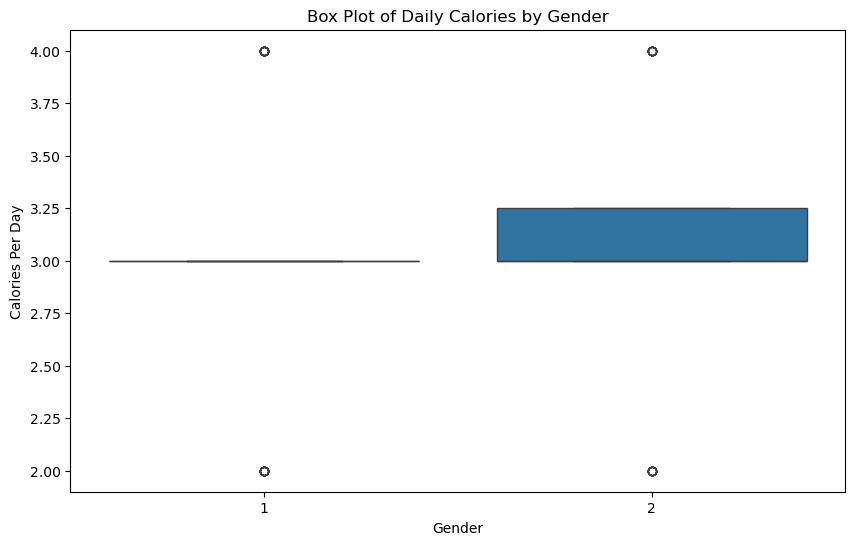

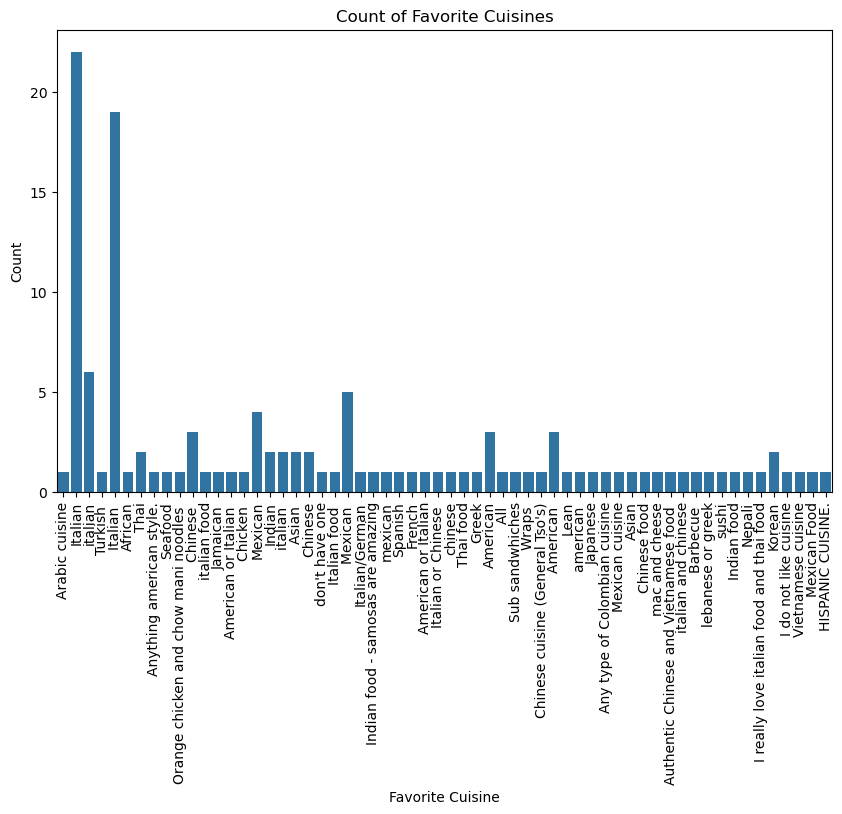

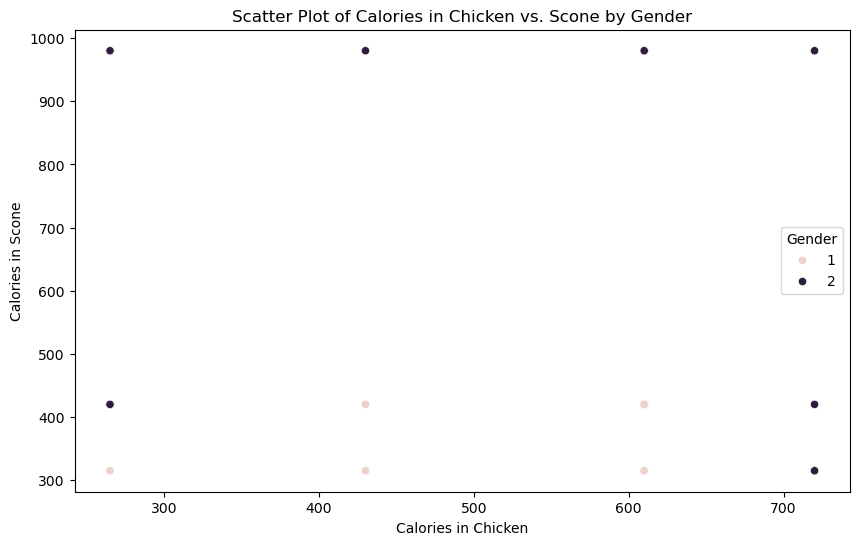

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram: Plots the distribution of calories_day (a numeric column)
plt.figure(figsize=(10, 6))
sns.histplot(data['calories_day'], kde=True)
plt.title('Distribution of Calories Per Day')
plt.xlabel('Calories Per Day')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Compares calories_chicken and calories_scone to see if there is any relationship between these variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories_chicken', y='calories_scone', data=data)
plt.title('Scatter Plot of Calories in Chicken vs. Scone')
plt.xlabel('Calories in Chicken')
plt.ylabel('Calories in Scone')
plt.show()

# Bar Plot: Shows the count of each gender from the Gender column
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Box Plot: Provides insights into the distribution of calories_day across different Gender categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='calories_day', data=data)
plt.title('Box Plot of Daily Calories by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Per Day')
plt.show()

# Bar Plot for Categorical Data: Displays the count of favorite cuisines. 
plt.figure(figsize=(10, 6))
sns.countplot(x='fav_cuisine', data=data)
plt.title('Count of Favorite Cuisines')
plt.xlabel('Favorite Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels if they overlap
plt.show()

# Scatter Plot with Hue: Adds a hue to differentiate points by Gender.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories_chicken', y='calories_scone', hue='Gender', data=data)
plt.title('Scatter Plot of Calories in Chicken vs. Scone by Gender')
plt.xlabel('Calories in Chicken')
plt.ylabel('Calories in Scone')
plt.legend(title='Gender')
plt.show()
